In [148]:
import numpy as np
from matplotlib import pyplot as plt
import ANN_feAuxFixed1 as TeacherFunc
from sklearn.model_selection import train_test_split
import time

dat = np.load('P1data.npy', allow_pickle=True) 
X = dat[:,:-1].astype(float) 
Y = dat[:, -1].reshape((-1,1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.14, random_state=1)

In [149]:
print(np.unique(Y))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

['A' 'B' 'C' 'D']
(3440, 2)
(3440, 1)
(560, 2)
(560, 1)


In [150]:
print(Y_train) # Y = [['B']]

[['B']
 ['C']
 ['A']
 ...
 ['A']
 ['B']
 ['A']]


In [157]:
import importlib
importlib.reload(TeacherFunc)

<module 'ANN_feAuxFixed1' from 'c:\\Users\\meang\\Desktop\\ANNfinal\\ZeroToHero\\ANN_feAuxFixed1.py'>

In [152]:
Y_Copy = Y_train

Y_Copy[Y_Copy == 'A'] = 0
Y_Copy[Y_Copy == 'B'] = 1
Y_Copy[Y_Copy == 'C'] = 2
Y_Copy[Y_Copy == 'D'] = 3
Y_Copy = Y_Copy.astype(int)
print(np.unique(Y_Copy))

[0 1 2 3]


In [153]:
Y_train_hot = TeacherFunc.onehot(Y_Copy)
print(Y_Copy)
print(Y_train_hot)
print(Y_train_hot.shape)

[[1]
 [2]
 [0]
 ...
 [0]
 [1]
 [0]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
(3440, 4)


In [156]:
Y_train_hot.shape

(3440, 4)

In [158]:
import importlib
importlib.reload(TeacherFunc)

<module 'ANN_feAuxFixed1' from 'c:\\Users\\meang\\Desktop\\ANNfinal\\ZeroToHero\\ANN_feAuxFixed1.py'>

Text(0.5, 1.0, 'good')

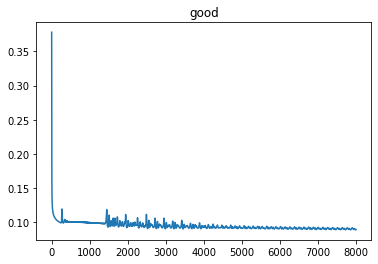

In [162]:
N, D = X_train.shape  # (3440, 2)
_, K = Y_train_hot.shape  # (3440, 4)

HU = 20
epochs = 8000

lr1Mul= 0.2
lr2Mul= 0.2

lr1 = (1/N) * lr1Mul
lr2 = (1/N) * lr2Mul

debugFileName = "testMeangpu.npy"

W1 = np.random.rand(HU, D) - 0.5  # w === make value between -0.5 to 0.5
b1 = np.random.rand(HU, 1) - 0.5   # b === make value between -0.5 to 0.5
W2 = np.random.rand(K, HU) - 0.5   # v === make value between -0.5 to 0.5
b2 = np.random.rand(K, 1) - 0.5   # c === make value between -0.5 to 0.5

cc, vv, bb, ww, train_loss = TeacherFunc.train_mlp2(b2, W2, b1, W1, X_train, Y_train_hot, lr1, lr2,
                                        epochs, TeacherFunc.identity, TeacherFunc.mse_loss)

net = {'c': cc, 'v': vv, 'b': bb, 'w': ww}
np.save(debugFileName, net)

# print(cc, vv, bb, ww)
plt.plot(train_loss)
plt.title('good')


In [163]:
# dummypar = np.load('P1_dummypar.npy', allow_pickle=True) 
# dummyw = np.load('P1_dummyw.npy', allow_pickle=True).tolist()
meangpuW = np.load(debugFileName, allow_pickle=True).tolist()

In [164]:
print(meangpuW['w'].shape)
print(meangpuW['b'].shape)
print(meangpuW['v'].shape)
print(meangpuW['c'].shape)

(20, 2)
(20, 1)
(4, 20)
(4, 1)


In [165]:
print(meangpuW['c'])

[[-0.39743721]
 [ 0.21862211]
 [ 0.57005759]
 [-0.11206653]]


In [166]:
Yp = TeacherFunc.mlp2(cc, vv, bb, ww, X_test, TeacherFunc.softmax)

predicted_classes = np.argmax(Yp, axis=1)  
predicted_classes = predicted_classes.reshape((-1,1))
# print(predicted_classes)

y_test_copy = Y_test
y_test_copy[y_test_copy == 'A'] = 0
y_test_copy[y_test_copy == 'B'] = 1
y_test_copy[y_test_copy == 'C'] = 2
y_test_copy[y_test_copy == 'D'] = 3
y_test_copy = y_test_copy.astype(int)


# print(y_test_copy)
    

test_acc = np.mean(predicted_classes == y_test_copy.astype(int))
print('Test accuracy', test_acc)

Test accuracy 0.7446428571428572


In [167]:
def P1_predict(x):
  """
  x: np.array of shape (N,D)
  return y: list of classes
  """

  # WRITE YOUR CODE HERE!!!
  # Load params
#   loaded_par = np.load('P1_dummypar.npy', allow_pickle=True).tolist()
  # Caution! you have to supply the data file! P1_dummypar.npy


  # Load weights
  loaded_net = np.load(debugFileName, allow_pickle=True).tolist()
  # Caution! you have to supply the data file! P1_dummyweights0.npy

  # Pre-process the input
#   px = x * loaded_par['p1']


  # Run network
  Yp = TeacherFunc.mlp2(loaded_net['c'], loaded_net['v'], 
          loaded_net['b'], loaded_net['w'], x, TeacherFunc.identity)

  # print(np.round(postY))
  # print(np.unique(np.round(postY)))
  realPredict = np.argmax(Yp, axis=1).reshape((-1,1))
  print(realPredict)
  print(np.unique(realPredict))

  class_labels = ['A', 'B', 'C', 'D']
  # print("============================================")
  # print(Yp)
  # print(np.round(postY))
  # print(np.unique(np.round(Yp)))
  # for n in np.round(Yp):
  #   print(class_labels[int(n)])
  # print("============================================")

  # predicted_labels = [class_labels[int(n)] for n in np.round(Yp)]
  predicted_labels = [class_labels[int(n)] for n in np.round(realPredict)]
  # print(np.unique(predicted_labels))


  return predicted_labels


In [132]:
dat = np.load('P1data.npy', allow_pickle=True)
X = dat[:,:-1].astype(float)

In [171]:
aaaaa = P1_predict(X)

[[3]
 [0]
 [0]
 ...
 [1]
 [3]
 [2]]
[0 1 2 3]


In [173]:

dat = np.load('P1data.npy', allow_pickle=True)
X = dat[:,:-1].astype(float)
Y = dat[:, -1]

plabs = P1_predict(X)
print(np.unique(plabs))

acc = np.mean(plabs == Y)
print('Accuracy', acc)


[[3]
 [0]
 [0]
 ...
 [1]
 [3]
 [2]]
[0 1 2 3]
['A' 'B' 'C' 'D']
Accuracy 0.74625
